## Machine Learning and Statistics Project 2020
***


The aim of this project is to create a web service that uses machine learning to make predictions based on the data set 'powerproduction'. The goal is to produce a model that accurately predicts wind turbine power output from wind speed values, as in the data set. Then, to develop a web service that will respond with predicted power values based on speed values sent as HTTP requests.

<br>



## Regression
***

Taking a look at the data as plotted on a scatterplot (below), my inclination would be to apply regression as a model. Given that the dataset contains only two variables, simple linear regression may be an option.  

<br>



Firstly, I import the necessary Python packages. `Numpy` to perform numeric calculations, `Pandas` for data manipulation and analysis, `Matplotlib.pyplot` for visualisation and `sklearn.model_selection` to train my model.


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import tensorflow.keras as kr


<br>

Next, I read in the dataset using `pandas.read_csv` which stores the data in a pandas dataframe. I assign this to the variable `pp` and output the first and final five rows to give a quick overview of the data.

In [2]:
pp = pd.read_csv('powerproduction.csv')
pp

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


<br>

The `describe()` function outputs a summary of the data giving us a more nuanced overview.

In [3]:
pp.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


<br>



Visualisation of the data gives us a useful preliminary indication as to what model to choose and train in order to predict values for the dependent variable. Below, I plot the data on a scatterplot. 



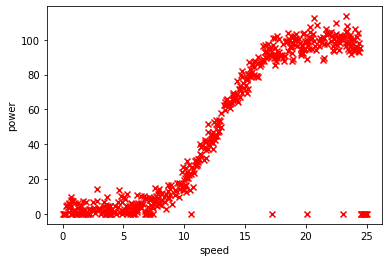

In [4]:
# Plot data on a scatter plot
plt.xlabel('speed')
plt.ylabel('power')
plt.scatter(pp['speed'], pp['power'], color='r', marker='x')

<br>



### Regression
Regression is a statistical method which describes the relationship between a dependent variable and one or more independent variables [1]. Additionally, it is associated with fitting a line (or curve) to the data by plotting the line over the data points to get the best fit [2]. With these two considerations in mind, regression appears to be an appropriate approach to take. Firstly, the aim of the current project is to predict wind turbine power output (*dependent variable*) based on speed values (*independent variable*). Second, taking a look data as plotted on a scatter plot, it is clear that we could fit a line (or curve) in order to accurately predict the dependent variable.

[1] Wikipedia; Regression analysis; https://en.wikipedia.org/wiki/Regression_analysis <br>
[2] yale.edu; Linear Regression; http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm <br>

I use a simple linear regression function imported from Python's Scikit-learn library to produce a model. Simple linear regression can be applied when the data set contains only two variables - a dependent and independent variable. This is a condition which is filled by the 'powerproduction' data set.

<br>

First, the data set is split into two separate columns in order to train the model.

In [5]:
# Create a new dataset containing only values from the speed column and print output
speed_df = pp.drop('power',axis='columns')
speed_df

,speed
0,0.000
1,0.125
2,0.150
3,0.225
4,0.275
...,...
495,24.775
496,24.850
497,24.875
498,24.950


In [6]:
# Create a new dataset containing only values from the power column and print output 
power_df = pp.drop('speed',axis='columns')
power_df

,power
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
495,0.0
496,0.0
497,0.0
498,0.0


<br>

Next, I create an instance of the LinearRegression() class and call the `fit` method, passing the speed and power dataframes as arguments. 

In [7]:
# Create an instance of the LinearRegression() class
reg = LinearRegression()

# Fit our data to the model
reg.fit(speed_df, power_df)

LinearRegression()

Once this is done, we can now test the model for accuracy. We can do this by calling a number of methods provided by the functionality of the `LinearRegresssion()` class.

<br>

First, I take a pick a value for speed and pass it to the `.predict` method

In [8]:
# Predict method using a value for speed
email = 10.89
arr = reg.predict([[9.746]])

<br>

Next, I call the `intercept_` method to determine where the line intercepts the y-axis. And below that I use call `coef_` to get the slope of the line. This gives us all the values for formula for the best-fitting line: $$y = mx + b$$ where m is the slope, b is the y-interept and x is the independent variable [3].

[3] dummies.com; How to calculate a regression line; https://www.dummies.com/education/math/statistics/how-to-calculate-a-regression-line/ <br>

In [9]:
# Call the intercept_ method to determine where the line intercepts the y-axis
reg.intercept_

array([-13.89990263])

In [10]:
# Call the coef_ method to calculate the slope of the line
reg.coef_

array([[4.91759567]])

In [11]:
# Set calculated values
m = 4.91759567
x = 9.746
b = -13.899902630519641

y = m*x + b
print(y)

34.02698476930036


As expected, we get the same result for y when we input these values into the formula (above)
<br>



### R-squared 

The `LinearRegression` class also provides functionality for calculating the the R-squared value. The R-squared value is a 'goodness-of-fit' measure which can give us an indication as to the accuracy of our regression model. The best possible score is 1.0, while a score of 0 or a negative value generally represents a worse-fitting line. The R-squared value "indicates the percentage of the variance in the dependent variable that the independent variables explain collectively." [4] It is worth noting that a high R-squared does not necessarily always indicate the best fit [5].

[4] Frost, J; How To Interpret R-squared in Regression Analysis; https://statisticsbyjim.com/regression/interpret-r-squared-regression/ <br>
[5] *Ibid*

In [12]:
# Calculate R-squared value
reg.score(speed_df, power_df)

0.7289360258564072

<br>


***

### Train_test_split

The train-test-split procedure involves training a machine learning algorithm by splitting the data into separate proportions. One proportion (train) is used to train the model while the other (test) is held back in order to test its accuracy. (It is worth pointing out that it may not always be appropriate as a technique to increase accuracy of prediction e.g. if the data set is too small [6].) 

<br>

Below, I pass the speed_df and power_df dataframes to the `train_test_split` method and set the parameter *test_size* to 0.2. The test size indicates the size of the train and test sets. Common split percentages include 
* Train: 80%, Test: 20%
* Train: 67%, Test: 33%
* Train: 50%, Test: 50% [7]


[6] machinelearningmastery.com; Train-Test Split for Evaluating Machine Learning Algorithms; https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/ <br>
[7] *Ibid*

In [13]:
# Call train_test_split method on dataframes
A_Train, A_Test, B_Train, B_Test = train_test_split(speed_df, power_df, test_size = 0.2)

In [14]:
x = pp['speed']
y = pp['power']

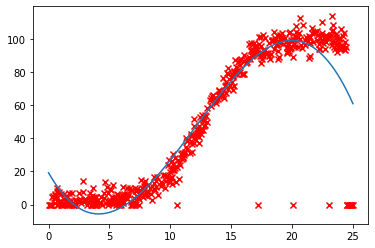

In [15]:
mymodel = np.poly1d(np.polyfit(x, y, 3))

myline = np.linspace(0, 25, 100)

plt.scatter(x, y, color='red', marker='x')
plt.plot(myline, mymodel(myline))
plt.show()


## Neural network - Regression

***

In [16]:
pp = pp[pp.power != 0]
pp.describe()

,speed,power
count,451.000000,451.000000
mean,13.004302,53.231246
std,6.835979,40.522055
min,0.325000,0.067000
25%,7.344500,8.543500
50%,13.038000,58.168000
75%,18.781500,94.725500
max,24.399000,113.556000


In [36]:
# Create neural network with one neuron
model = kr.models.Sequential()
model.add(kr.Input(shape=(1,)))
model.add(kr.layers.Dense(100, activation='relu', kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
model.add(kr.layers.Dense(100, activation='relu', kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
model.compile(kr.optimizers.Adam(lr=0.001), loss='mean_squared_error')

In [37]:


msk = np.random.rand(len(pp)) < 0.5
train = pp[msk]

test = pp[~msk]

In [40]:
model.fit(train['speed'], train['power'], epochs=1000, batch_size=2)

Epoch 1/1000
43/43 [==============================] - 0s 3ms/step - loss: 19.8402
Epoch 2/1000
43/43 [==============================] - 0s 3ms/step - loss: 20.4881
Epoch 3/1000
43/43 [==============================] - 0s 3ms/step - loss: 23.2263
Epoch 4/1000
43/43 [==============================] - 0s 3ms/step - loss: 19.2812
Epoch 5/1000
43/43 [==============================] - 0s 3ms/step - loss: 20.5060
Epoch 6/1000
43/43 [==============================] - 0s 3ms/step - loss: 18.6859
Epoch 7/1000
43/43 [==============================] - 0s 3ms/step - loss: 20.2386
Epoch 8/1000
43/43 [==============================] - 0s 3ms/step - loss: 20.5504
Epoch 9/1000
43/43 [==============================] - 0s 3ms/step - loss: 17.9371
Epoch 10/1000
43/43 [==============================] - 0s 2ms/step - loss: 17.5901
Epoch 11/1000
43/43 [==============================] - 0s 3ms/step - loss: 19.3080
Epoch 12/1000
43/43 [==============================] - 0s 3ms/step - loss: 21.1407
Epoch 13/1000

43/43 [==============================] - 0s 3ms/step - loss: 18.4704
Epoch 100/1000
43/43 [==============================] - 0s 3ms/step - loss: 17.2350
Epoch 101/1000
43/43 [==============================] - 0s 3ms/step - loss: 17.6271
Epoch 102/1000
43/43 [==============================] - 0s 2ms/step - loss: 17.4469
Epoch 103/1000
43/43 [==============================] - 0s 3ms/step - loss: 17.1758
Epoch 104/1000
43/43 [==============================] - 0s 3ms/step - loss: 16.6263
Epoch 105/1000
43/43 [==============================] - 0s 3ms/step - loss: 17.9223
Epoch 106/1000
43/43 [==============================] - 0s 3ms/step - loss: 17.0988
Epoch 107/1000
43/43 [==============================] - 0s 3ms/step - loss: 17.9929
Epoch 108/1000
43/43 [==============================] - 0s 3ms/step - loss: 19.6709
Epoch 109/1000
43/43 [==============================] - 0s 3ms/step - loss: 21.5758
Epoch 110/1000
43/43 [==============================] - 0s 2ms/step - loss: 19.2430
Epoch 1

43/43 [==============================] - 0s 2ms/step - loss: 19.0602
Epoch 197/1000
43/43 [==============================] - 0s 3ms/step - loss: 18.5767
Epoch 198/1000
43/43 [==============================] - 0s 3ms/step - loss: 21.3622
Epoch 199/1000
43/43 [==============================] - 0s 3ms/step - loss: 16.9162
Epoch 200/1000
43/43 [==============================] - 0s 3ms/step - loss: 18.5321
Epoch 201/1000
43/43 [==============================] - 0s 3ms/step - loss: 17.8205
Epoch 202/1000
43/43 [==============================] - 0s 2ms/step - loss: 20.9354
Epoch 203/1000
43/43 [==============================] - 0s 2ms/step - loss: 16.1574
Epoch 204/1000
43/43 [==============================] - 0s 3ms/step - loss: 18.4374
Epoch 205/1000
43/43 [==============================] - 0s 2ms/step - loss: 19.2826
Epoch 206/1000
43/43 [==============================] - 0s 2ms/step - loss: 18.5035
Epoch 207/1000
43/43 [==============================] - 0s 3ms/step - loss: 18.1819
Epoch 2

43/43 [==============================] - 0s 2ms/step - loss: 17.8096
Epoch 294/1000
43/43 [==============================] - 0s 2ms/step - loss: 18.4344
Epoch 295/1000
43/43 [==============================] - 0s 2ms/step - loss: 16.7421
Epoch 296/1000
43/43 [==============================] - 0s 2ms/step - loss: 16.7565
Epoch 297/1000
43/43 [==============================] - 0s 2ms/step - loss: 18.6141
Epoch 298/1000
43/43 [==============================] - 0s 2ms/step - loss: 18.2250
Epoch 299/1000
43/43 [==============================] - 0s 3ms/step - loss: 16.7302
Epoch 300/1000
43/43 [==============================] - 0s 2ms/step - loss: 16.4624
Epoch 301/1000
43/43 [==============================] - 0s 3ms/step - loss: 21.6926
Epoch 302/1000
43/43 [==============================] - 0s 2ms/step - loss: 17.3835
Epoch 303/1000
43/43 [==============================] - 0s 2ms/step - loss: 17.4336
Epoch 304/1000
43/43 [==============================] - 0s 2ms/step - loss: 17.6820
Epoch 3

43/43 [==============================] - 0s 3ms/step - loss: 20.9599
Epoch 391/1000
43/43 [==============================] - 0s 3ms/step - loss: 17.1835
Epoch 392/1000
43/43 [==============================] - 0s 3ms/step - loss: 17.3908
Epoch 393/1000
43/43 [==============================] - 0s 3ms/step - loss: 19.6856
Epoch 394/1000
43/43 [==============================] - 0s 3ms/step - loss: 20.6620
Epoch 395/1000
43/43 [==============================] - 0s 3ms/step - loss: 18.7830
Epoch 396/1000
43/43 [==============================] - 0s 3ms/step - loss: 17.8277
Epoch 397/1000
43/43 [==============================] - 0s 3ms/step - loss: 21.4581
Epoch 398/1000
43/43 [==============================] - 0s 3ms/step - loss: 18.7167
Epoch 399/1000
43/43 [==============================] - 0s 3ms/step - loss: 17.3978
Epoch 400/1000
43/43 [==============================] - 0s 3ms/step - loss: 18.1860
Epoch 401/1000
43/43 [==============================] - 0s 3ms/step - loss: 17.3196
Epoch 4

43/43 [==============================] - 0s 2ms/step - loss: 17.2086
Epoch 488/1000
43/43 [==============================] - 0s 3ms/step - loss: 17.5016
Epoch 489/1000
43/43 [==============================] - 0s 3ms/step - loss: 17.1849
Epoch 490/1000
43/43 [==============================] - 0s 3ms/step - loss: 19.0956
Epoch 491/1000
43/43 [==============================] - 0s 3ms/step - loss: 17.0290
Epoch 492/1000
43/43 [==============================] - 0s 3ms/step - loss: 17.2709
Epoch 493/1000
43/43 [==============================] - 0s 3ms/step - loss: 17.5348
Epoch 494/1000
43/43 [==============================] - 0s 3ms/step - loss: 17.1599
Epoch 495/1000
43/43 [==============================] - 0s 3ms/step - loss: 20.0784
Epoch 496/1000
43/43 [==============================] - 0s 3ms/step - loss: 16.6259
Epoch 497/1000
43/43 [==============================] - 0s 3ms/step - loss: 17.4489
Epoch 498/1000
43/43 [==============================] - 0s 3ms/step - loss: 18.0664
Epoch 4

43/43 [==============================] - 0s 3ms/step - loss: 17.5931
Epoch 584/1000
43/43 [==============================] - 0s 3ms/step - loss: 17.6755
Epoch 585/1000
43/43 [==============================] - 0s 3ms/step - loss: 17.0917
Epoch 586/1000
43/43 [==============================] - 0s 3ms/step - loss: 18.1654
Epoch 587/1000
43/43 [==============================] - 0s 3ms/step - loss: 18.8657
Epoch 588/1000
43/43 [==============================] - 0s 3ms/step - loss: 17.9886
Epoch 589/1000
43/43 [==============================] - 0s 3ms/step - loss: 19.3636
Epoch 590/1000
43/43 [==============================] - 0s 3ms/step - loss: 17.0889
Epoch 591/1000
43/43 [==============================] - 0s 3ms/step - loss: 18.9957
Epoch 592/1000
43/43 [==============================] - 0s 3ms/step - loss: 17.0749
Epoch 593/1000
43/43 [==============================] - 0s 3ms/step - loss: 18.1420
Epoch 594/1000
43/43 [==============================] - 0s 3ms/step - loss: 18.2233
Epoch 5

43/43 [==============================] - 0s 3ms/step - loss: 18.9949
Epoch 681/1000
43/43 [==============================] - 0s 3ms/step - loss: 17.3550
Epoch 682/1000
43/43 [==============================] - 0s 3ms/step - loss: 16.3340
Epoch 683/1000
43/43 [==============================] - 0s 3ms/step - loss: 18.7963
Epoch 684/1000
43/43 [==============================] - 0s 3ms/step - loss: 16.4783
Epoch 685/1000
43/43 [==============================] - 0s 3ms/step - loss: 18.5266
Epoch 686/1000
43/43 [==============================] - 0s 3ms/step - loss: 16.7122
Epoch 687/1000
43/43 [==============================] - 0s 3ms/step - loss: 17.2668
Epoch 688/1000
43/43 [==============================] - 0s 3ms/step - loss: 15.9583
Epoch 689/1000
43/43 [==============================] - 0s 3ms/step - loss: 16.9061
Epoch 690/1000
43/43 [==============================] - 0s 3ms/step - loss: 17.8995
Epoch 691/1000
43/43 [==============================] - 0s 2ms/step - loss: 15.9678
Epoch 6

43/43 [==============================] - 0s 3ms/step - loss: 16.4132
Epoch 778/1000
43/43 [==============================] - 0s 3ms/step - loss: 16.7421
Epoch 779/1000
43/43 [==============================] - 0s 3ms/step - loss: 17.0853
Epoch 780/1000
43/43 [==============================] - 0s 3ms/step - loss: 18.5138
Epoch 781/1000
43/43 [==============================] - 0s 3ms/step - loss: 18.0970
Epoch 782/1000
43/43 [==============================] - 0s 3ms/step - loss: 16.4927
Epoch 783/1000
43/43 [==============================] - 0s 3ms/step - loss: 17.7951
Epoch 784/1000
43/43 [==============================] - 0s 3ms/step - loss: 17.3997
Epoch 785/1000
43/43 [==============================] - 0s 3ms/step - loss: 17.2484
Epoch 786/1000
43/43 [==============================] - 0s 3ms/step - loss: 16.5734
Epoch 787/1000
43/43 [==============================] - 0s 3ms/step - loss: 16.6670
Epoch 788/1000
43/43 [==============================] - 0s 3ms/step - loss: 18.0918
Epoch 7

43/43 [==============================] - 0s 3ms/step - loss: 17.1462
Epoch 875/1000
43/43 [==============================] - 0s 3ms/step - loss: 16.3750
Epoch 876/1000
43/43 [==============================] - 0s 3ms/step - loss: 16.4050
Epoch 877/1000
43/43 [==============================] - 0s 3ms/step - loss: 16.7862
Epoch 878/1000
43/43 [==============================] - 0s 3ms/step - loss: 17.0384
Epoch 879/1000
43/43 [==============================] - 0s 3ms/step - loss: 16.4665
Epoch 880/1000
43/43 [==============================] - 0s 3ms/step - loss: 17.7312
Epoch 881/1000
43/43 [==============================] - 0s 3ms/step - loss: 17.4114
Epoch 882/1000
43/43 [==============================] - 0s 3ms/step - loss: 18.4088
Epoch 883/1000
43/43 [==============================] - 0s 3ms/step - loss: 16.9119
Epoch 884/1000
43/43 [==============================] - 0s 3ms/step - loss: 16.6226
Epoch 885/1000
43/43 [==============================] - 0s 3ms/step - loss: 17.9225
Epoch 8

43/43 [==============================] - 0s 3ms/step - loss: 17.8952
Epoch 972/1000
43/43 [==============================] - 0s 3ms/step - loss: 16.6173: 0s - loss: 16.45
Epoch 973/1000
43/43 [==============================] - 0s 3ms/step - loss: 17.4750
Epoch 974/1000
43/43 [==============================] - 0s 3ms/step - loss: 18.4212
Epoch 975/1000
43/43 [==============================] - 0s 3ms/step - loss: 18.0662
Epoch 976/1000
43/43 [==============================] - 0s 2ms/step - loss: 18.0620
Epoch 977/1000
43/43 [==============================] - 0s 3ms/step - loss: 17.4328
Epoch 978/1000
43/43 [==============================] - 0s 3ms/step - loss: 18.4218
Epoch 979/1000
43/43 [==============================] - 0s 3ms/step - loss: 16.2702
Epoch 980/1000
43/43 [==============================] - 0s 3ms/step - loss: 17.3974
Epoch 981/1000
43/43 [==============================] - 0s 3ms/step - loss: 16.1580
Epoch 982/1000
43/43 [==============================] - 0s 3ms/step - los

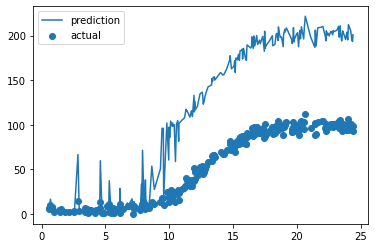

In [42]:
plt.scatter(test['speed'], test['power'], label='actual')
plt.plot(test['speed'], model.predict(test['power']), label='prediction')
plt.legend()